In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import base
import sys
import statistics

LENGTH = 15


In [2]:
# Function returns array of sum distances (one element for each grid)
def get_sums_of_mutual_distances(type):
    grouped_users = base.get_dataset_and_group_by_user()
    fail_top = []
    fail_som = []
    success_top = []
    success_som = []

    histogram_indexes = []
    for i in range(100):
        histogram_indexes.append('histogram_' + str(i))

    for username, group in grouped_users:
        group = base.filter_out_mess(group)
        group_by_target = group.groupby('target_id')

        for target, target_group in group_by_target:
            if target_group.shape[0] < 6:
                continue
            histogram = target_group[target_group['type'] != 'guess'][histogram_indexes]
            histogram = histogram.mul(np.linspace(0, 2, 100), axis=1).sum(axis=1)

            if target_group.iloc[0]["display_type"] == "top":
                if target_group[target_group['guess_video'] == target_group['target_video']].empty:
                    if type == 'asc':
                        fail_top.append(histogram.sort_index(ascending=True).reset_index(drop=True))
                    else:
                        fail_top.append(histogram.sort_index(ascending=False).reset_index(drop=True))
                else:
                    if type == 'asc':
                        success_top.append(histogram.sort_index(ascending=True).reset_index(drop=True))
                    else:
                        success_top.append(histogram.sort_index(ascending=False).reset_index(drop=True))

            else:
                if target_group[target_group['guess_video'] == target_group['target_video']].empty:
                    if type == 'asc':
                        fail_som.append(histogram.sort_index(ascending=True).reset_index(drop=True))
                    else:
                        fail_som.append(histogram.sort_index(ascending=False).reset_index(drop=True))
                else:
                    if type == 'asc':
                        success_som.append(histogram.sort_index(ascending=True).reset_index(drop=True))
                    else:
                        success_som.append(histogram.sort_index(ascending=False).reset_index(drop=True))

    return success_som, success_top, fail_som, fail_top

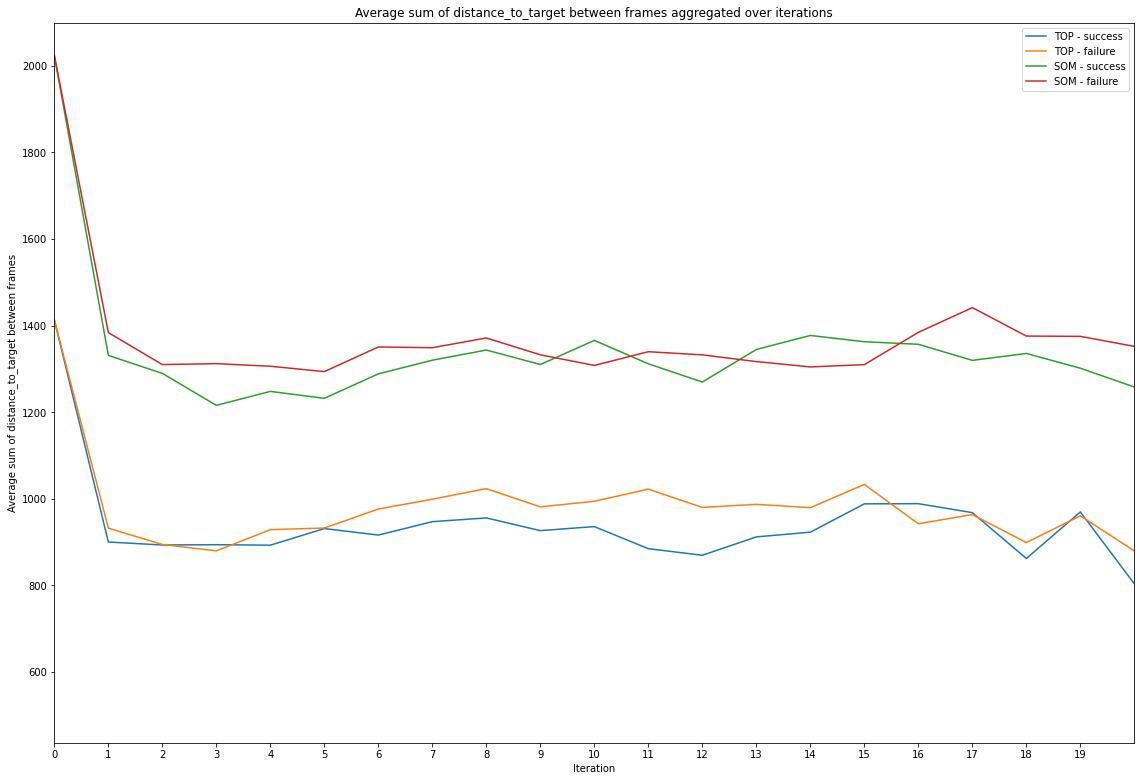

<Figure size 1440x1440 with 0 Axes>

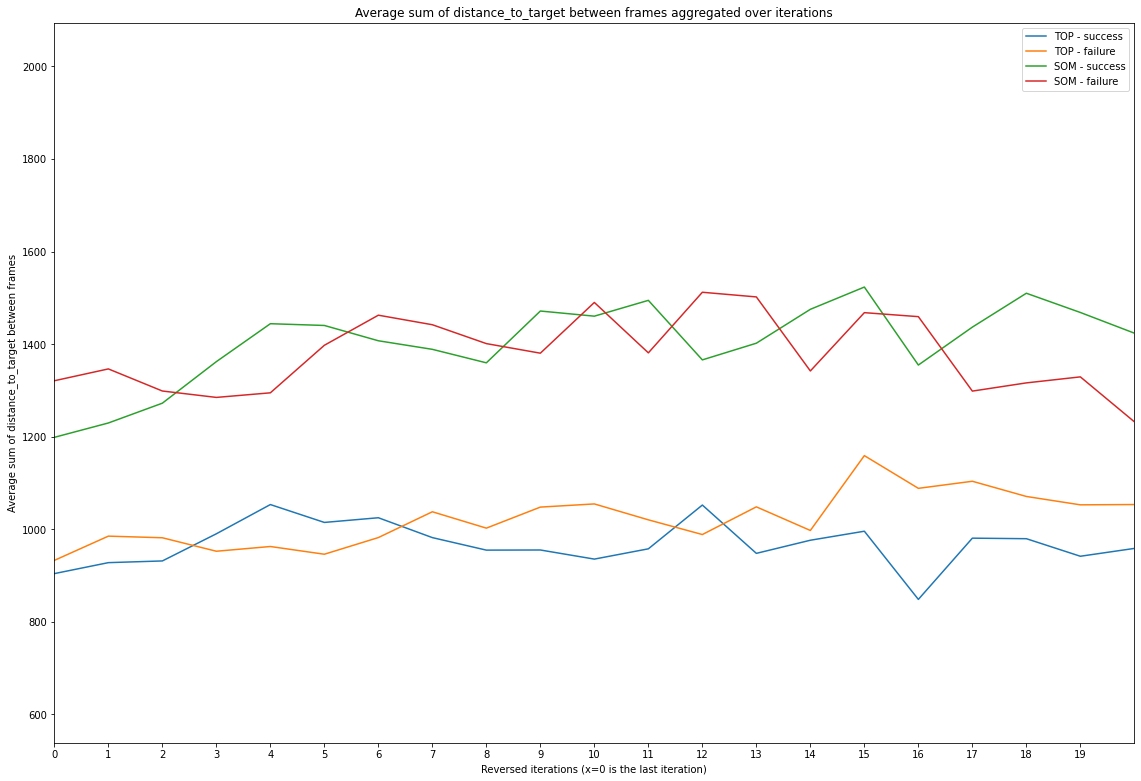

<Figure size 1440x1440 with 0 Axes>

In [3]:
for type in ["asc", "desc"]:
    
    %matplotlib inline
    fig, ax = plt.subplots()

    success_som, success_top, fail_som, fail_top = get_sums_of_mutual_distances(type)

    agregated_users_fail_top = pd.DataFrame(fail_top).mean(axis=0, skipna=True)
    agregated_users_fail_som = pd.DataFrame(fail_som).mean(axis=0, skipna=True)

    agregated_users_success_top = pd.DataFrame(success_top).mean(axis=0, skipna=True)
    agregated_users_success_som = pd.DataFrame(success_som).mean(axis=0, skipna=True)

    agregated_users_success_top.plot.line(label="TOP - success")
    agregated_users_fail_top.plot.line(label="TOP - failure")
    agregated_users_success_som.plot.line(label="SOM - success")
    agregated_users_fail_som.plot.line(label="SOM - failure")


    # print number of entries (failure)
    iterator = 0
    xmax = 20

    if type=='asc':
        plt.xlabel('Iteration')
    else:
        plt.xlabel('Reversed iterations (x=0 is the last iteration)')
    plt.ylabel('Average sum of distance_to_target between frames')

    plt.xticks(list(range(xmax)))
    plt.xlim(xmin=0, xmax=xmax)
    plt.title("Average sum of distance_to_target between frames aggregated over iterations")
    plt.legend(loc="upper right")
    
    plt.figure(figsize=(20,20))
    fig.subplots_adjust(0,0,2.5,2.5) # make plots bigger in Jupyter

    plt.show()

In [4]:
# Function returns array of average distances (one element for each grid)
def get_average_of_mutual_distances(type):
    grouped_users = base.get_dataset_and_group_by_user()
    fail_top = []
    fail_som = []
    success_top = []
    success_som = []

    histogram_indexes = []
    for i in range(100):
        histogram_indexes.append('histogram_' + str(i))

    for username, group in grouped_users:
        group = base.filter_out_mess(group)
        group_by_target = group.groupby('target_id')

        for target, target_group in group_by_target:
            last_text_index = target_group.where(target_group['type'] == 'text').last_valid_index()
            target_group1 = target_group
            if last_text_index is None:
                continue
            target_group = target_group.loc[last_text_index + 1:]
            histogram = target_group[target_group['type'] != 'guess'][histogram_indexes]
            distances = np.linspace(0, 2, 100)
            result = []
            for _, histogram_it in histogram.iterrows():
                all_distances = []
                for i in range(100):
                    all_distances += [distances[i]] * histogram_it[i]
                result.append(statistics.mean(all_distances))

            if target_group1.iloc[0]["display_type"] == "top":
                if target_group[target_group['guess_video'] == target_group['target_video']].empty:
                    if type == 'asc':
                        fail_top.append(result)
                    else:
                        fail_top.append(list(reversed(result)))
                else:
                    if type == 'asc':
                        success_top.append(result)
                    else:
                        success_top.append(list(reversed(result)))

            else:
                if target_group[target_group['guess_video'] == target_group['target_video']].empty:
                    if type == 'asc':
                        fail_som.append(result)
                    else:
                        fail_som.append(list(reversed(result)))
                else:
                    if type == 'asc':
                        success_som.append(result)
                    else:
                        success_som.append(list(reversed(result)))

    return success_som, success_top, fail_som, fail_top


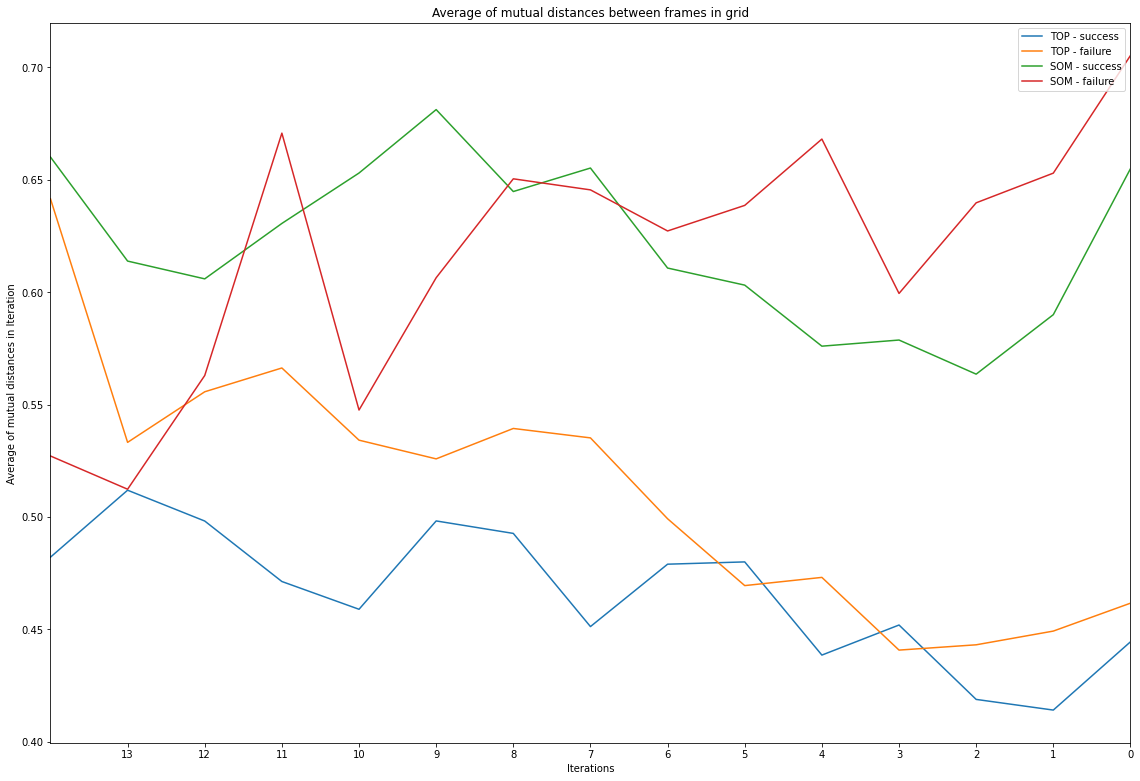

<Figure size 1440x1440 with 0 Axes>

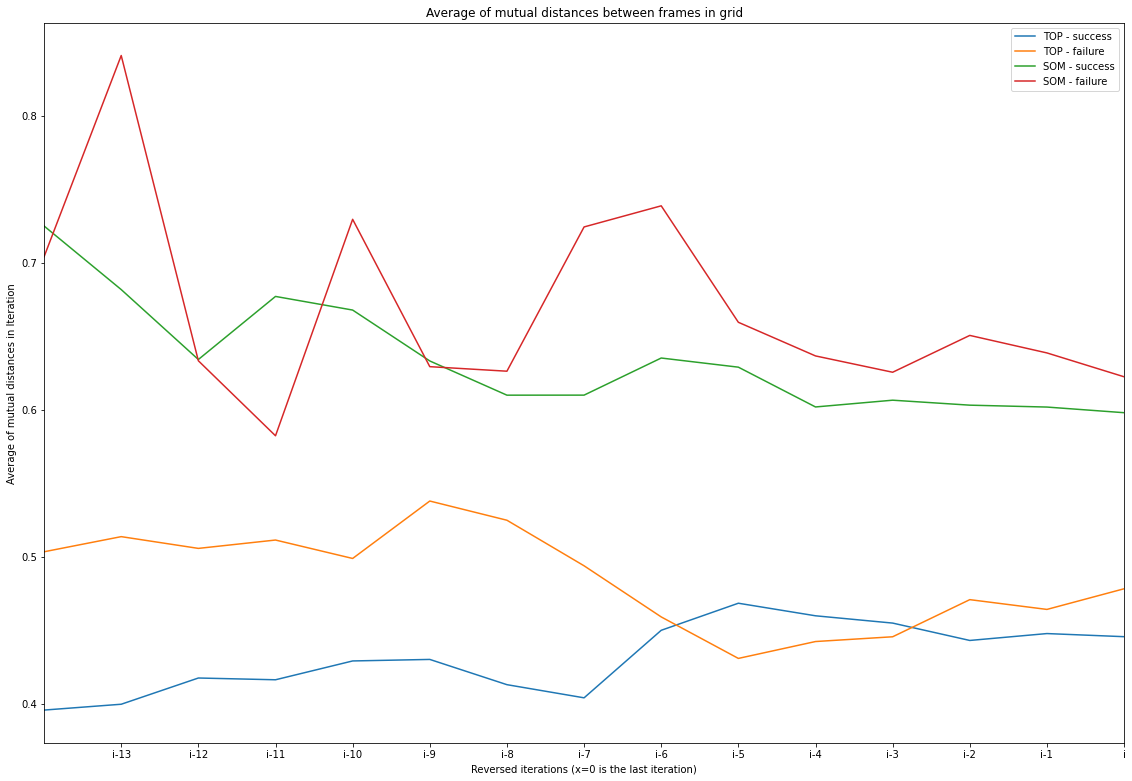

<Figure size 1440x1440 with 0 Axes>

In [5]:
for type in ["asc", "desc"]:
    
    %matplotlib inline
    fig, ax = plt.subplots()

    success_som, success_top, fail_som, fail_top = get_average_of_mutual_distances(type)

    agregated_users_fail_top = pd.DataFrame(fail_top).mean(axis=0, skipna=True).iloc[:LENGTH]
    agregated_users_fail_som = pd.DataFrame(fail_som).mean(axis=0, skipna=True).iloc[:LENGTH]

    agregated_users_success_top = pd.DataFrame(success_top).mean(axis=0, skipna=True).iloc[:LENGTH]
    agregated_users_success_som = pd.DataFrame(success_som).mean(axis=0, skipna=True).iloc[:LENGTH]

    agregated_users_success_top.plot.line(label="TOP - success")
    agregated_users_fail_top.plot.line(label="TOP - failure")
    agregated_users_success_som.plot.line(label="SOM - success")
    agregated_users_fail_som.plot.line(label="SOM - failure")

    # print number of entries (failure)
    iterator = 0
    xmax = LENGTH-1

    if type == 'asc':
        plt.xlabel('Iterations')
        plt.xticks(list(range(xmax)))
    else:
        plt.xlabel('Reversed iterations (x=0 is the last iteration)')
        plt.xticks(list(range(xmax)), list(['i'] + ["i-" + str(i) for i in range(1, xmax)]))
    plt.ylabel('Average of mutual distances in Iteration')

    plt.xlim(xmin=0, xmax=xmax)
    plt.gca().invert_xaxis()
    plt.title("Average of mutual distances between frames in grid")
    plt.legend(loc="upper right")

    plt.figure(figsize=(20,20))
    fig.subplots_adjust(0,0,2.5,2.5) # make plots bigger in Jupyter

    plt.show()